<a href="https://colab.research.google.com/github/KunalDM1999/Task-6-K-Nearest-Neighbors-KNN-Classification/blob/main/Task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Preprocessing**
**importing all imports**  

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# For plotting decision boundaries (only works with 2D features)
from matplotlib.colors import ListedColormap


**data loding**

In [2]:
data= pd.read_csv('/content/Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


**Encoding**

In [6]:
# Drop the 'Id' column
data = data.drop('Id', axis=1)

# Encode the target column 'Species' using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Species'] = le.fit_transform(data['Species'])  # setosa=0, versicolor=1, virginica=2
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**Distribution** **plots**

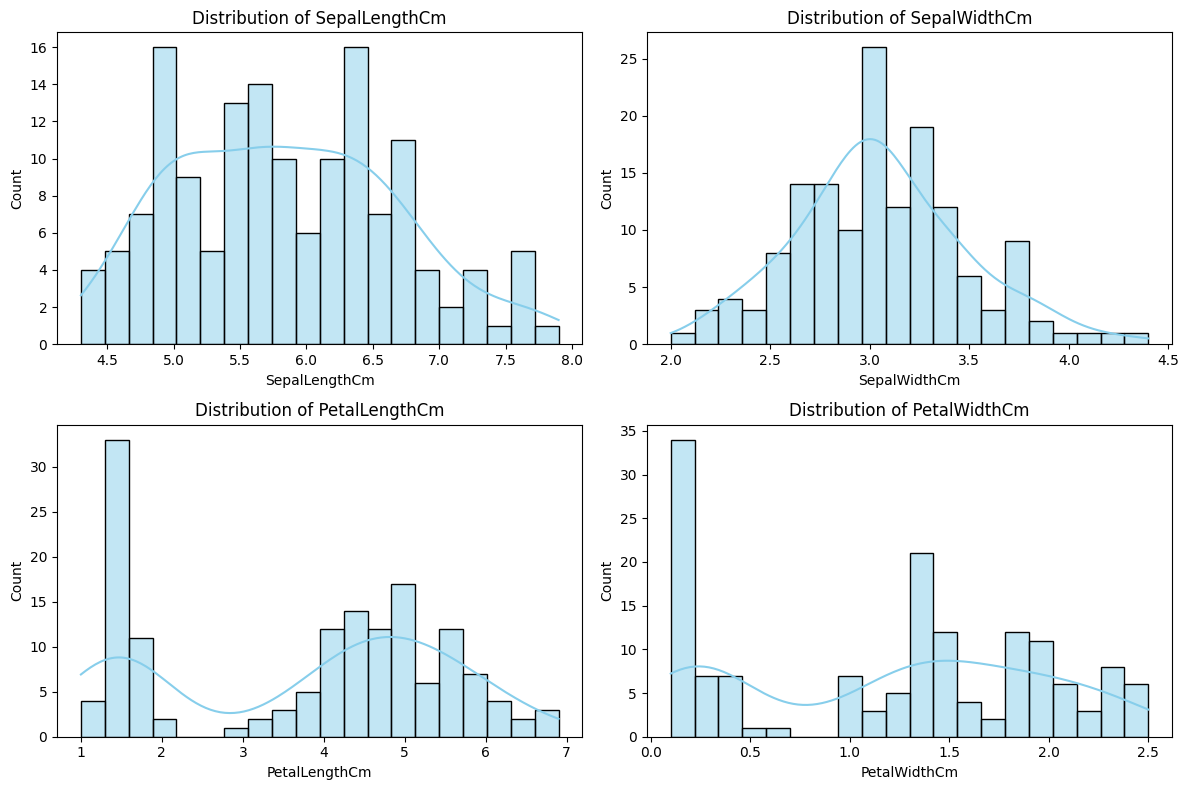

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [10]:
feature_cols = data.columns[:-1]

plt.figure(figsize=(12, 8))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
print(data[feature_cols].describe())


**Standardize features**

In [11]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('Species', axis=1)
y = data['Species']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


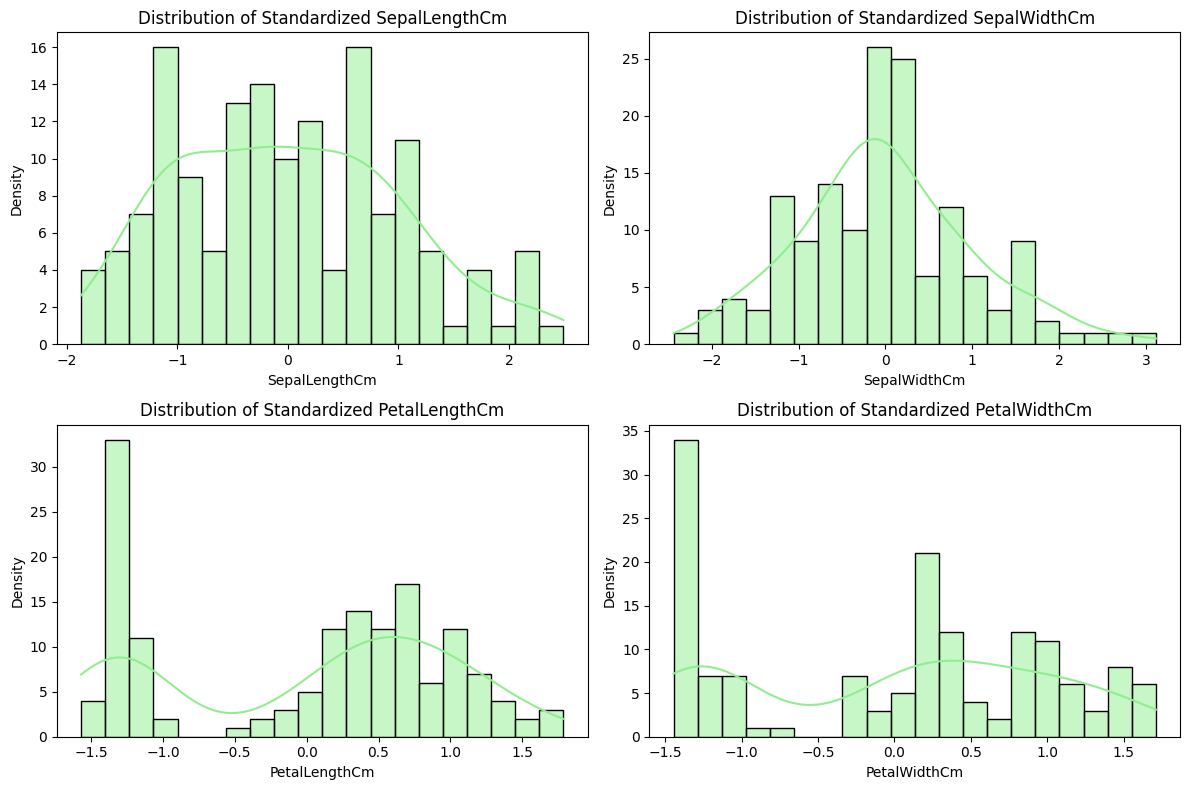

In [14]:
# Convert standardized features back to a DataFrame for easy plotting
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

plt.figure(figsize=(12, 8))
for i, col in enumerate(X_scaled_df.columns):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X_scaled_df[col], kde=True, bins=20, color='lightgreen')
    plt.title(f'Distribution of Standardized {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


**Boxplot**


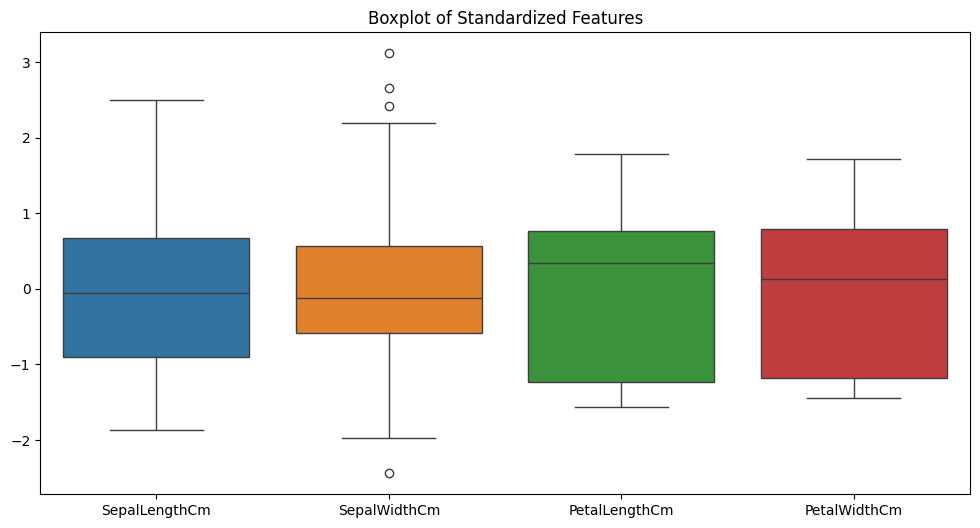

In [15]:
# Boxplots
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled_df)
plt.title("Boxplot of Standardized Features")
plt.show()


**correlation heatmap**

Found 0.96 correlation between PetalLengthCm and PetalWidthCm.



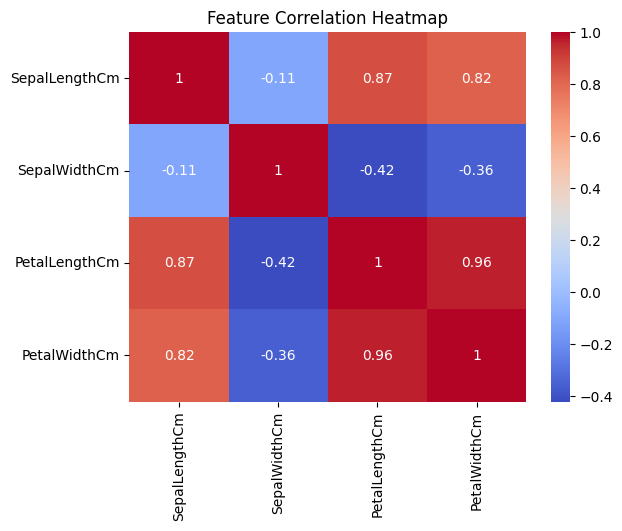

In [16]:
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# **Train test spliting**

In [17]:

# X is already scaled; y is label-encoded
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)


# **model bulding**
**model treaning**

In [18]:

# Try K = 3 (you can change this later)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)


**model evluation**

Accuracy: 0.9111

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.79      1.00      0.88        15
 Iris-virginica       1.00      0.73      0.85        15

       accuracy                           0.91        45
      macro avg       0.93      0.91      0.91        45
   weighted avg       0.93      0.91      0.91        45



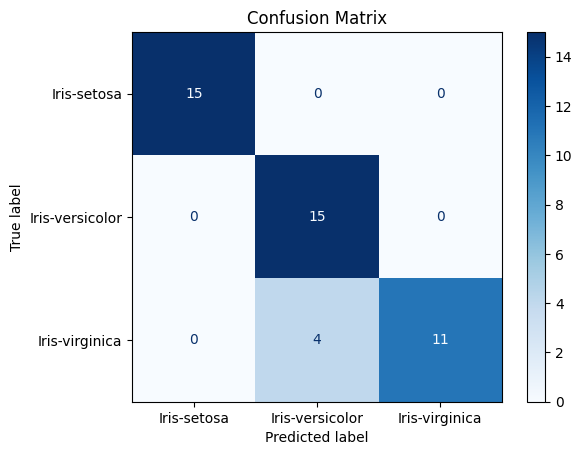

In [19]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# **Error Rate vs K Value plot**

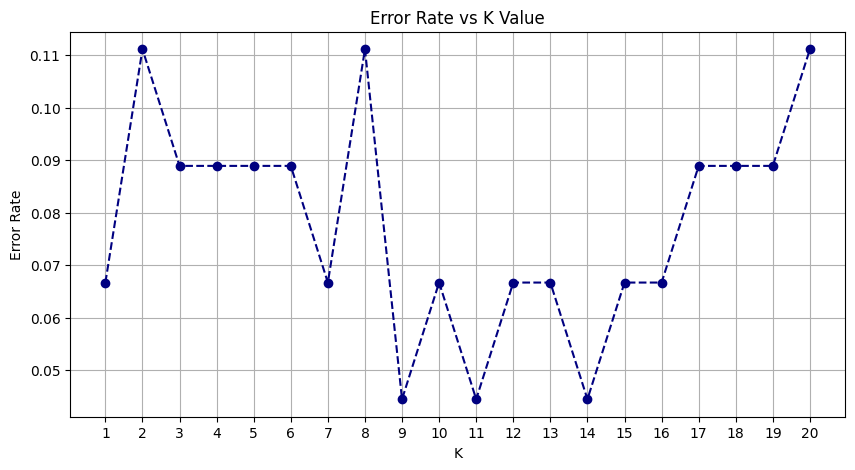

In [20]:
error_rates = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error = 1 - accuracy_score(y_test, pred_k)
    error_rates.append(error)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rates, marker='o', linestyle='--', color='navy')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


**treaning with best k value**

Final Accuracy (K=11): 0.9556

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.87      0.93        15

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



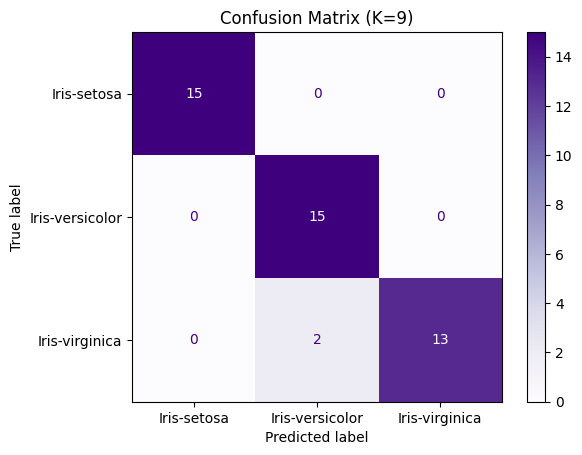

In [25]:
# Final KNN model with K = 9
best_knn = KNeighborsClassifier(n_neighbors=9)
best_knn.fit(X_train, y_train)
y_pred_final = best_knn.predict(X_test)

print(f"Final Accuracy (K=11): {accuracy_score(y_test, y_pred_final):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_final, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_final)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix (K=9)")
plt.show()


# **Decision Boundary Visualization**
**Chose PetalLengthCm and PetalWidthCm for 2D visualization due to high correlation and clear separation of classes.**

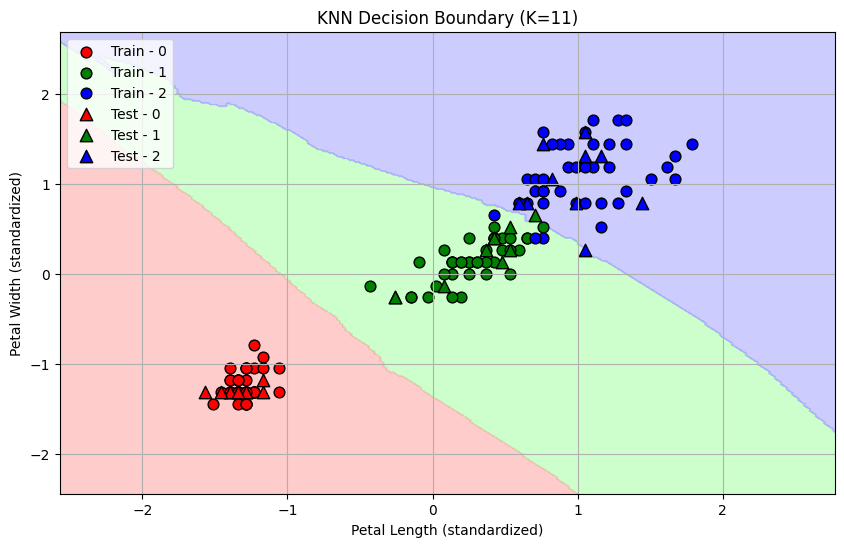

In [26]:
from matplotlib.colors import ListedColormap

# Use only PetalLength and PetalWidth
features = ['PetalLengthCm', 'PetalWidthCm']
X_two = data[features].values
y = le.fit_transform(data['Species'])
# Standardize
scaler = StandardScaler()
X_two_scaled = scaler.fit_transform(X_two)

# Train-test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_two_scaled, y, test_size=0.2, stratify=y, random_state=42)

# Fit KNN with best K (e.g., 11)
knn2 = KNeighborsClassifier(n_neighbors=11)
knn2.fit(X_train2, y_train2)

# Set up mesh grid
h = 0.02  # step size
x_min, x_max = X_two_scaled[:, 0].min() - 1, X_two_scaled[:, 0].max() + 1
y_min, y_max = X_two_scaled[:, 1].min() - 1, X_two_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in the mesh
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Set up plot
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ['red', 'green', 'blue']
labels = le.classes_

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)

# Plot training points
for idx, label in enumerate(np.unique(y_train2)):
    plt.scatter(X_train2[y_train2 == label, 0], X_train2[y_train2 == label, 1],
                c=cmap_bold[idx], label=f"Train - {labels[label]}", edgecolor='k', marker='o', s=60)

# Plot test points
for idx, label in enumerate(np.unique(y_test2)):
    plt.scatter(X_test2[y_test2 == label, 0], X_test2[y_test2 == label, 1],
                c=cmap_bold[idx], label=f"Test - {labels[label]}", edgecolor='k', marker='^', s=80)

plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title('KNN Decision Boundary (K=11)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

# **Interpretation**

1. **Iris-setosa (0),	Red	Perfectly classified and	Clearly separable class**

2. **Iris-versicolor (1),	Green	Mostly correct and 	Some overlap near class 2**

3. **Iris-virginica (2),	Blue	Mostly correct and	Minor confusion with class 1**